# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Great Learning/1.0 Python - Foundations/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 5 numerical columns and 4 object type columns in the dataset.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# checking for duplicates
df.duplicated().sum()

0

#### Observations: There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: The minimum time it takes to for an order to be prepped is 20.0 minutes, the maximum time is 35.0 minutes, and the average is 27.0 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [ ]:
df['rating'].nunique()

4

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations: Based off of the statistical summary of the data and the 4 unique results in the ratings columns, there are 736 orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: title={'center': 'Histogram: Rating'}, xlabel='rating', ylabel='Count'>

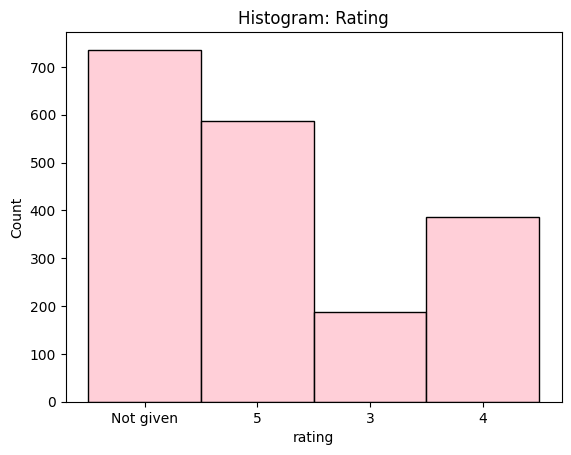

In [ ]:
plt.title('Histogram: Rating')
sns.histplot(data=df, x='rating',  color='pink')

<Axes: title={'center': 'Histogram: Cost of the Order'}, xlabel='cost_of_the_order', ylabel='Count'>

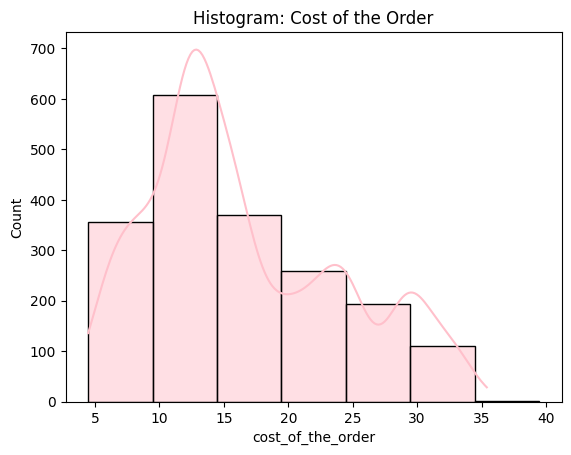

In [ ]:
plt.title('Histogram: Cost of the Order')
sns.histplot(data=df, x='cost_of_the_order', binwidth=5, kde="True" , color='pink')

<Axes: title={'center': 'Histogram: Day of the Week'}, xlabel='day_of_the_week', ylabel='Count'>

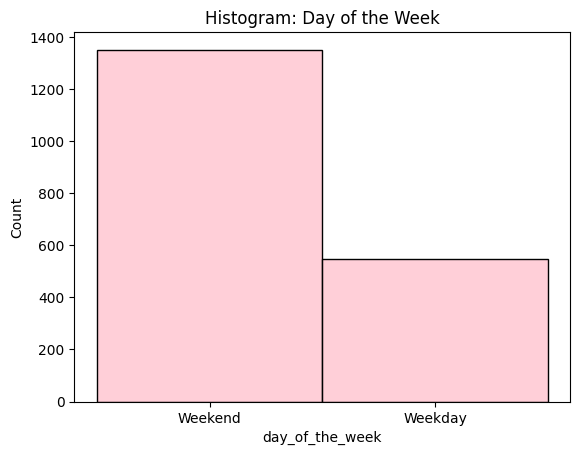

In [ ]:
plt.title("Histogram: Day of the Week")
sns.histplot(data=df, x='day_of_the_week',  color='pink')

<Axes: title={'center': 'Food Preparation Time'}, xlabel='food_preparation_time', ylabel='Count'>

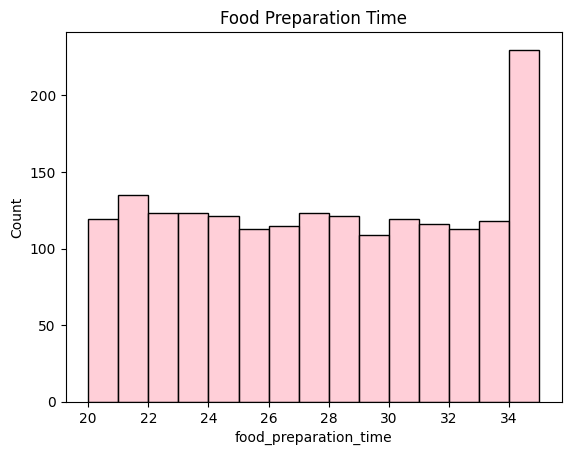

In [ ]:
plt.title("Food Preparation Time")
sns.histplot(data=df, x='food_preparation_time', binwidth= 1, color='pink')

<Axes: title={'center': 'Histogram: Delivery Time'}, xlabel='delivery_time', ylabel='Count'>

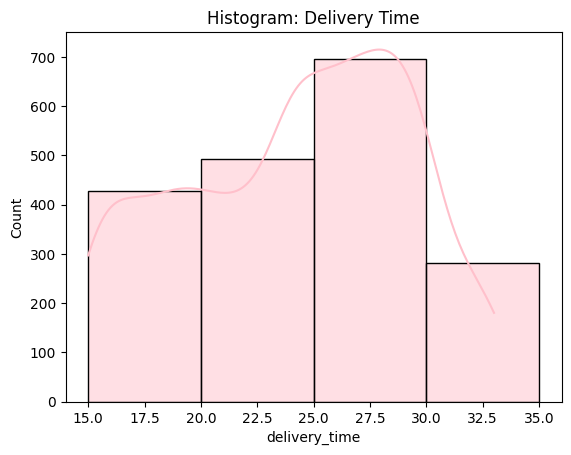

In [ ]:
plt.title("Histogram: Delivery Time")
sns.histplot(data=df, x = 'delivery_time', binwidth=5, kde="True", color='pink')

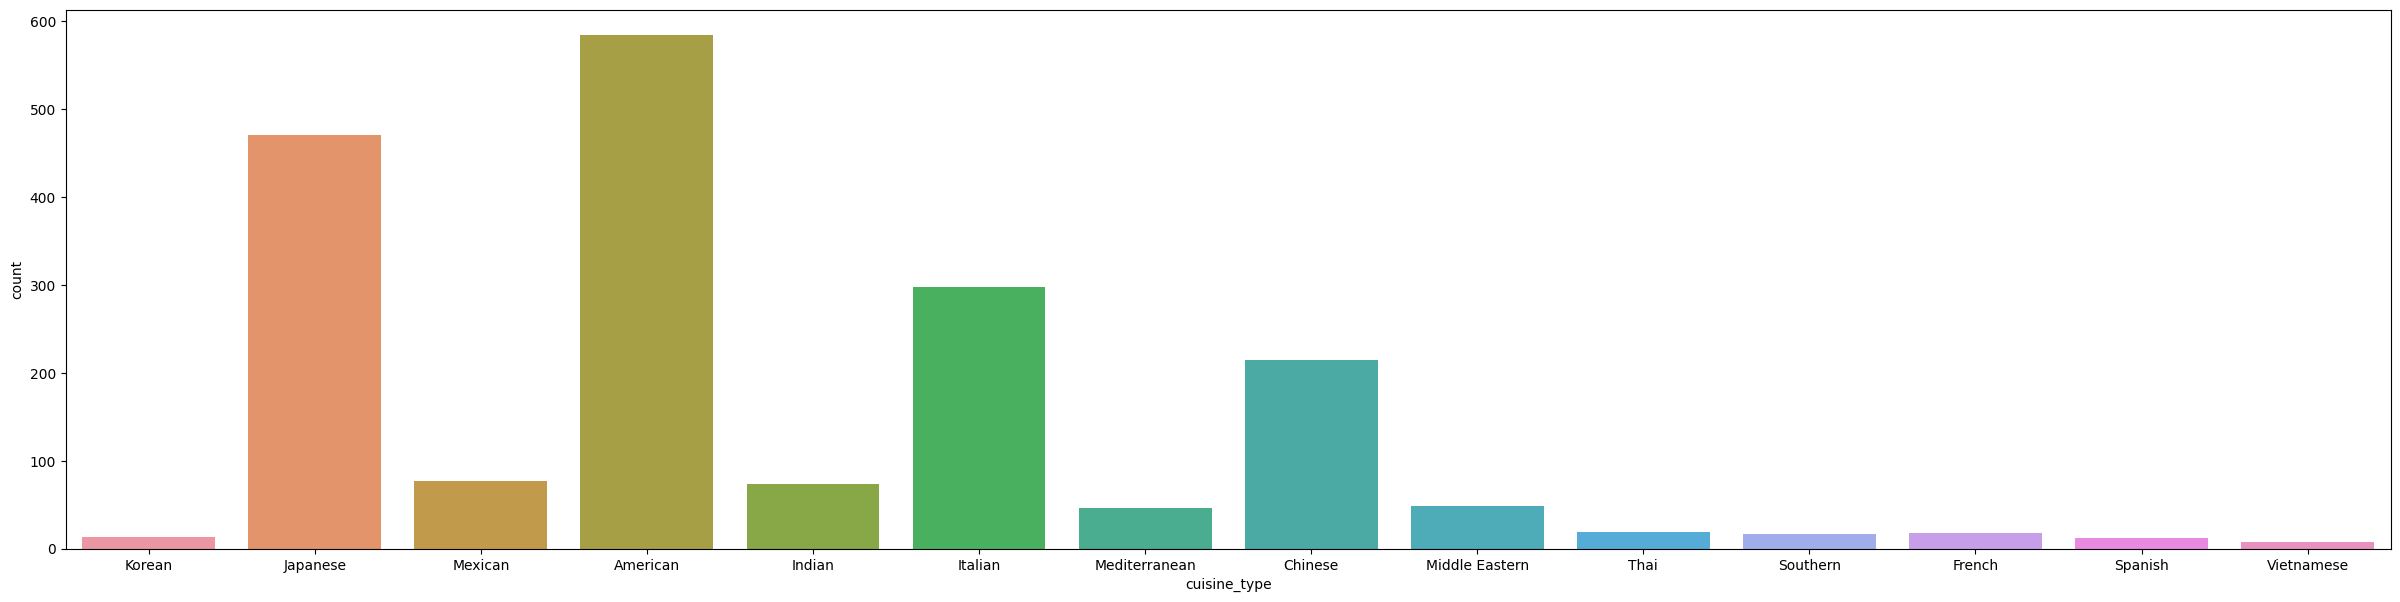

In [ ]:
plt.figure(figsize=(30,7))
sns.countplot(data=df, x='cuisine_type');

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


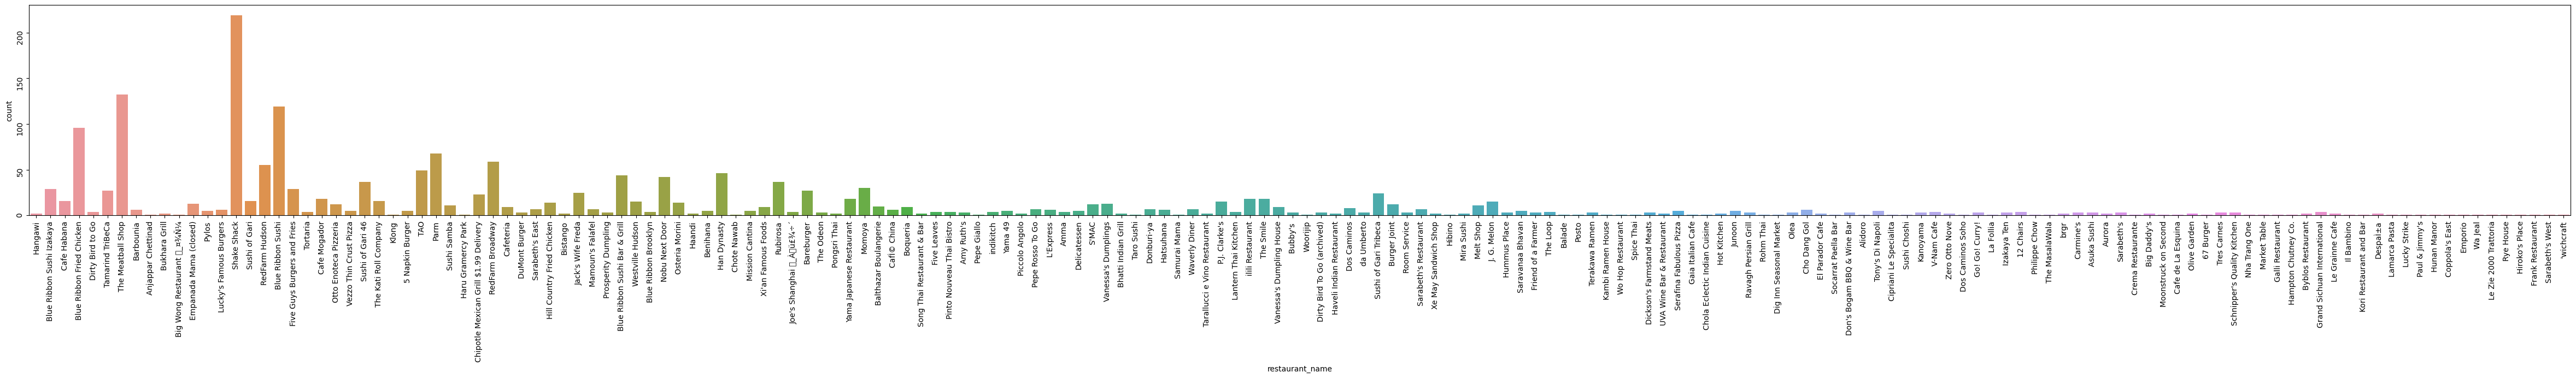

In [ ]:
# Write the code here
plt.figure(figsize=(60,5))
sns.countplot(data=df, x='restaurant_name')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


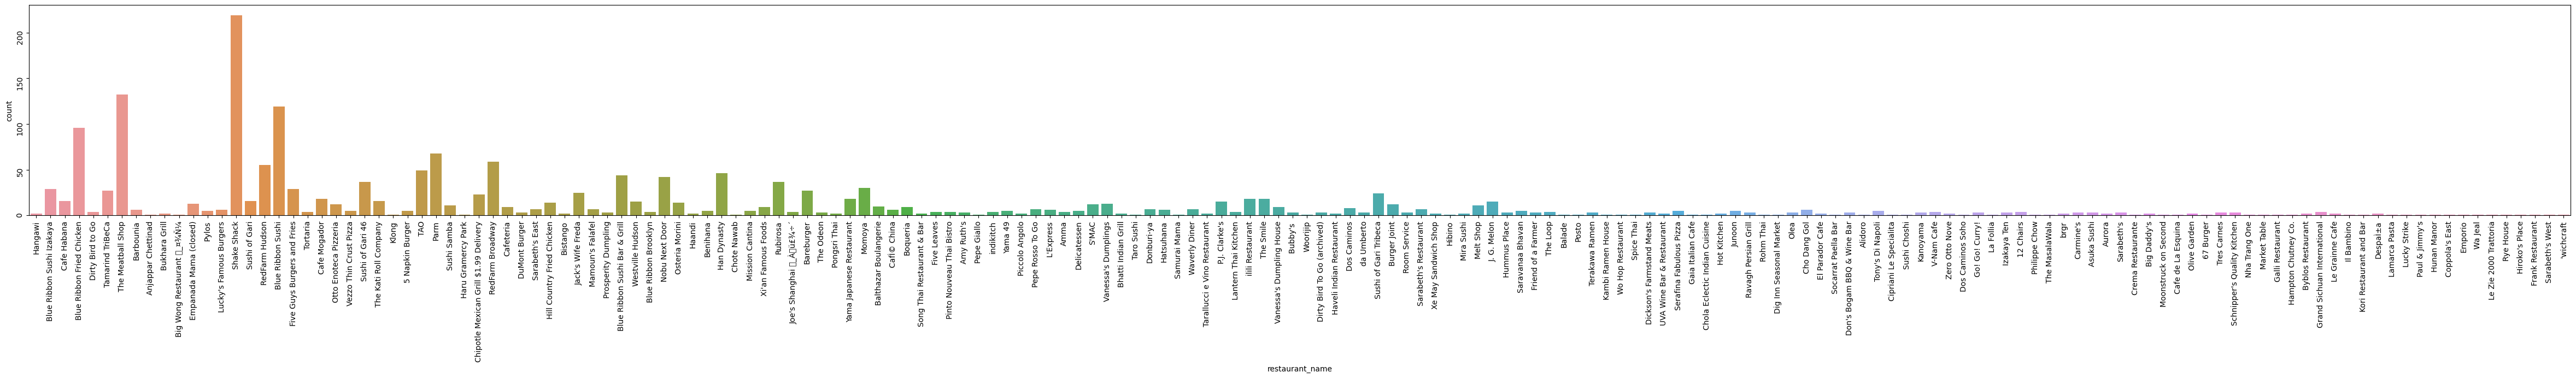

In [ ]:
# Write the code here
plt.figure(figsize=(60,5))
sns.countplot(data=df, x='restaurant_name')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['restaurant_name']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------


#### Observations: The top 5 restaurants for orders received are Shake Shack, the Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

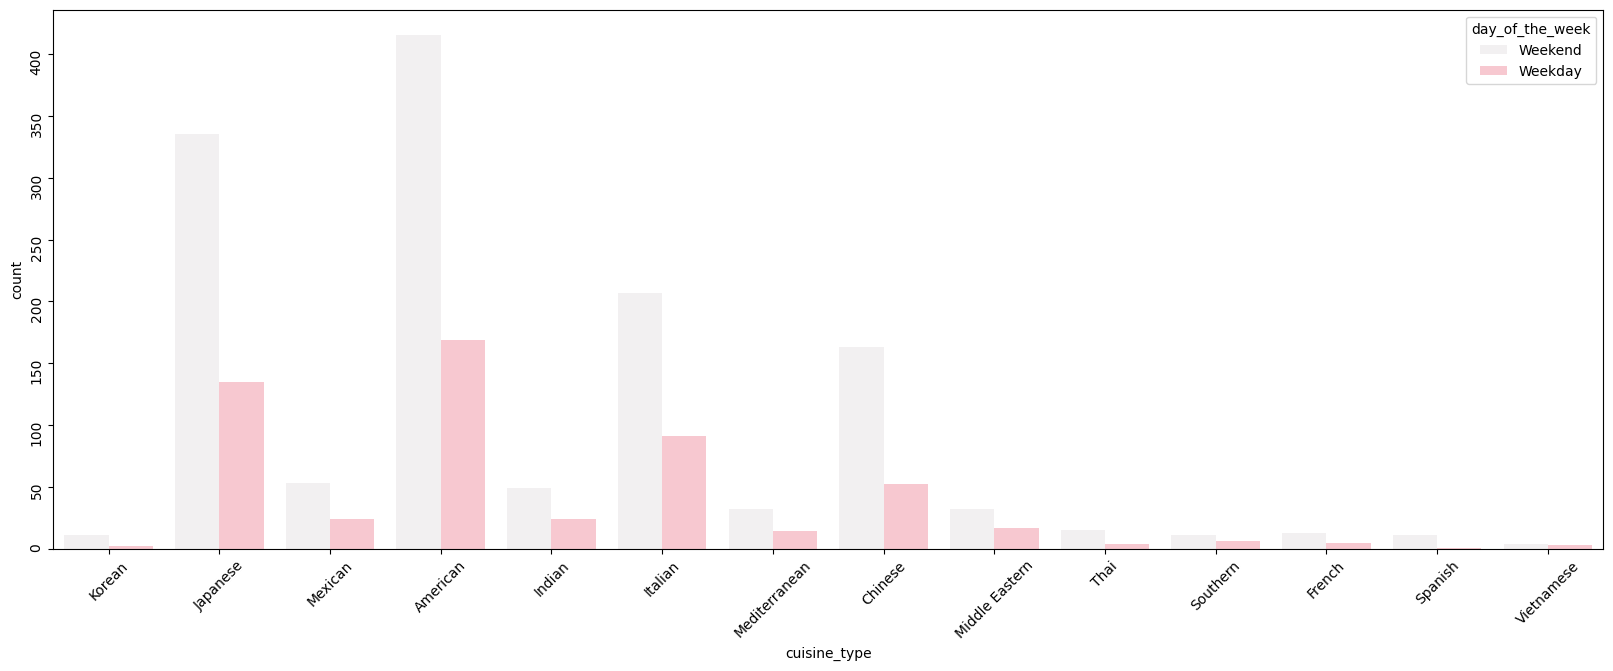

In [ ]:
# Write the code here
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', color='pink');
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()

#### Observations: The most popular cuisine on the weekends is American cuisine.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

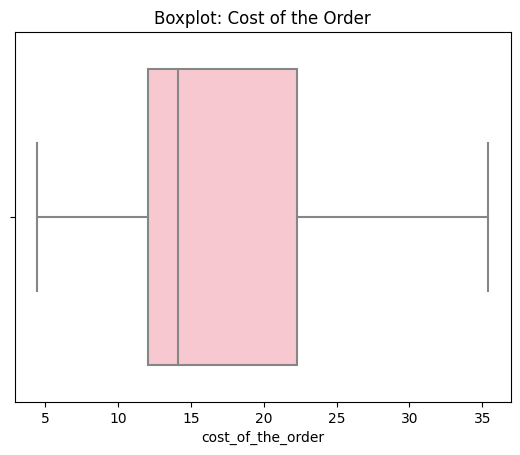

In [ ]:
# Write the code here
plt.title('Boxplot: Cost of the Order')
plt.xlabel('cost_of_the_order')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='cost_of_the_order',color='pink');

#### Observations: About 30% of the orders cost more than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

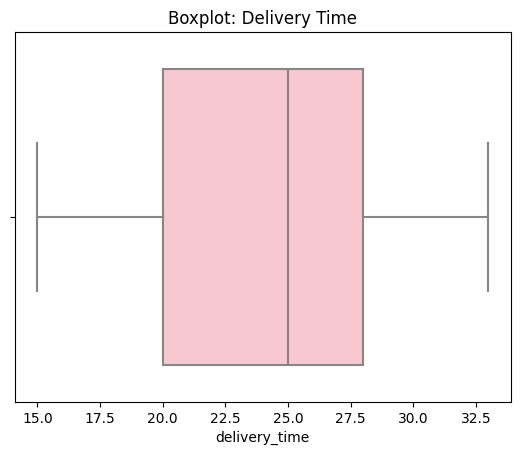

In [ ]:
# Write the code here
plt.title('Boxplot: Delivery Time')
plt.xlabel('delivery_time')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='delivery_time',color='pink');

#### Observations: The mean order delivery time is about 25.0 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

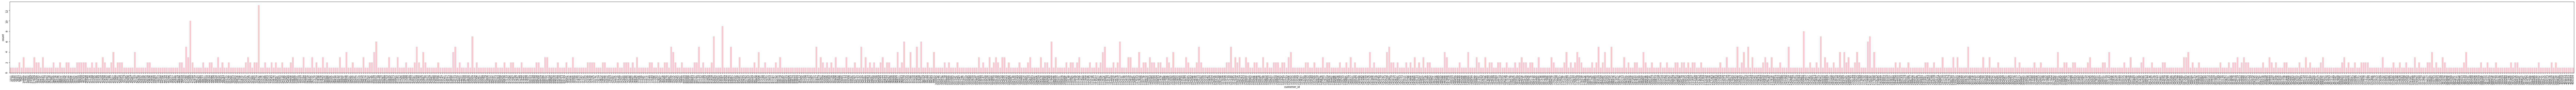

In [ ]:
# Write the code here
plt.figure(figsize=(180,5))
sns.countplot(data=df, x='customer_id', color='pink');
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['customer_id', 'order_id']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64
--------------------------------------------------
1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64
--------------------------------------------------


#### Observations: The highest number of orders was made by customer ID 52832 with 13 orders; the second highest is 47440 with 10 orders, and the third highest is 83287 with 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-218-b547eaa8dce0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


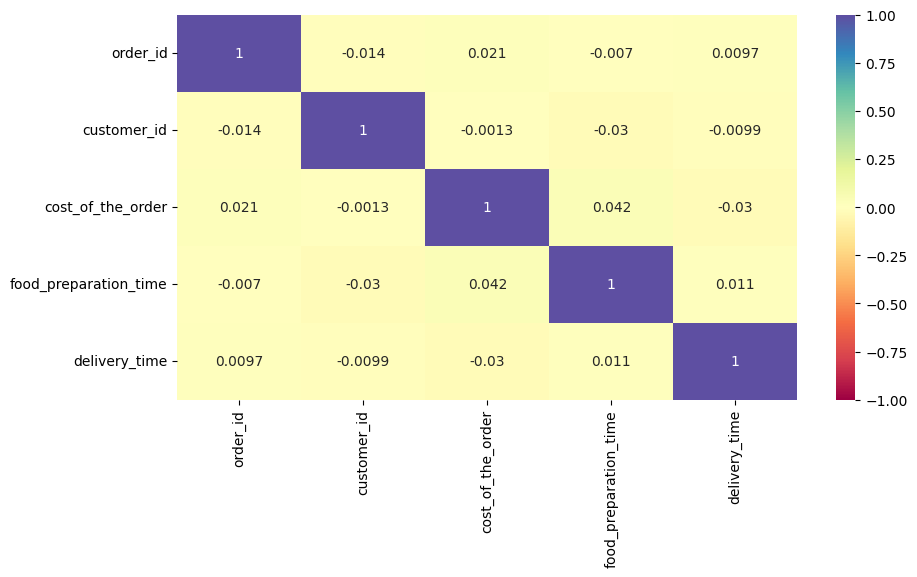

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

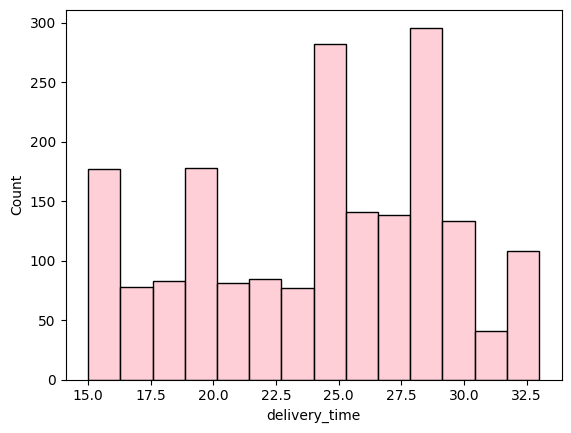

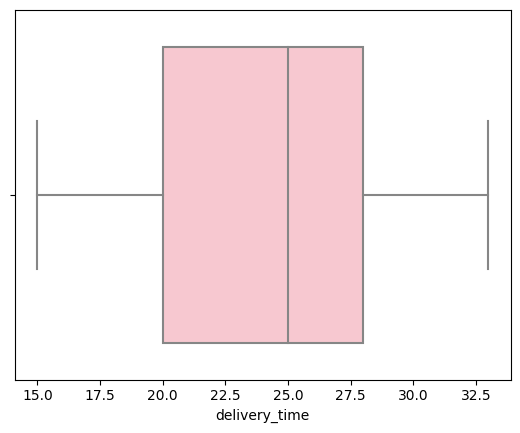

In [ ]:
sns.histplot(data=df,x='delivery_time', color='pink')
plt.show()
sns.boxplot(data=df,x='delivery_time', color='pink')
plt.show()

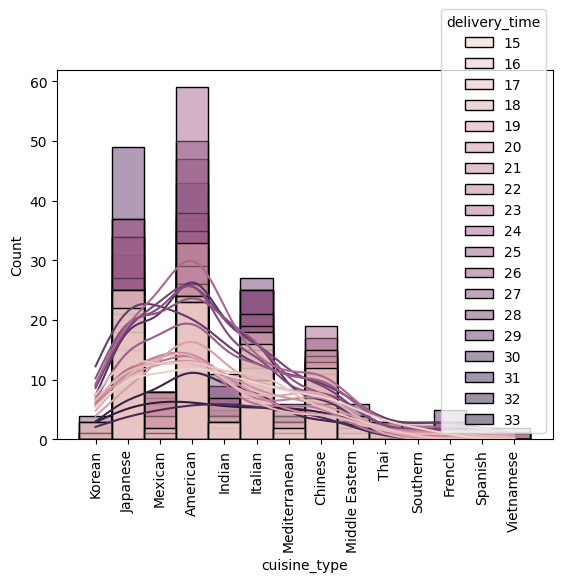

In [ ]:
# Write the code here
sns.histplot(data=df, x='cuisine_type', hue='delivery_time', kde=True);
plt.xticks(rotation=90)
plt.show()

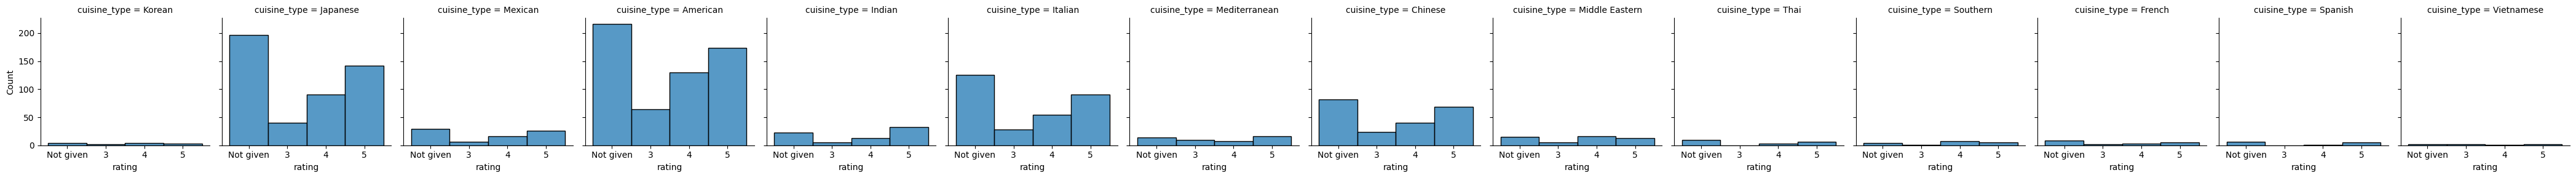

In [ ]:
g = sns.FacetGrid(df, col="cuisine_type")
g.map(sns.histplot, "rating");

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 140 (\x8c) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 142 (\x8e) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


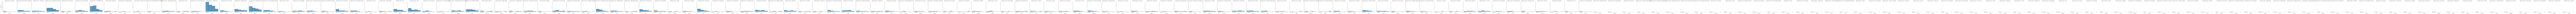

In [ ]:
g = sns.FacetGrid(df, col="restaurant_name")
g.map(sns.histplot, "rating");

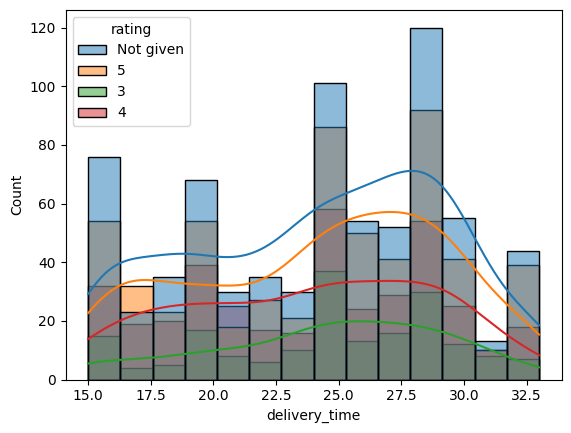

In [ ]:
sns.histplot(data=df, x='delivery_time', hue='rating', kde=True);

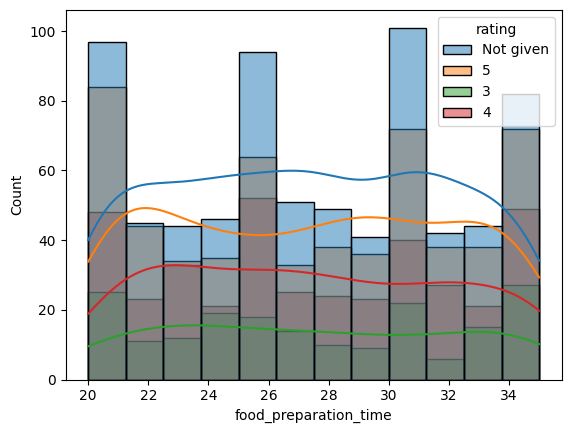

In [ ]:
sns.histplot(data=df, x='food_preparation_time', hue='rating', kde=True);

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


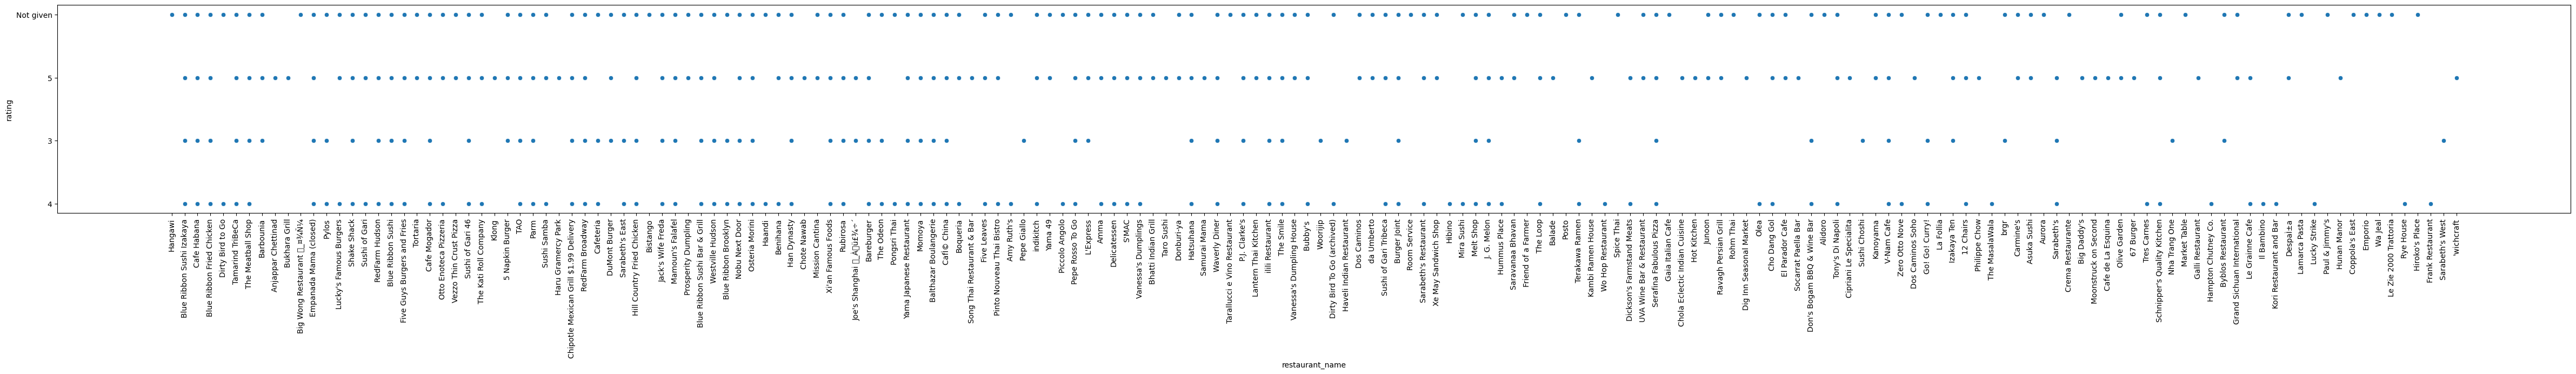

In [ ]:
plt.figure(figsize=(60,5))
#plt.xlim(0,55)
sns.scatterplot(data=df,x='restaurant_name',y='rating')
plt.xticks(rotation=90)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


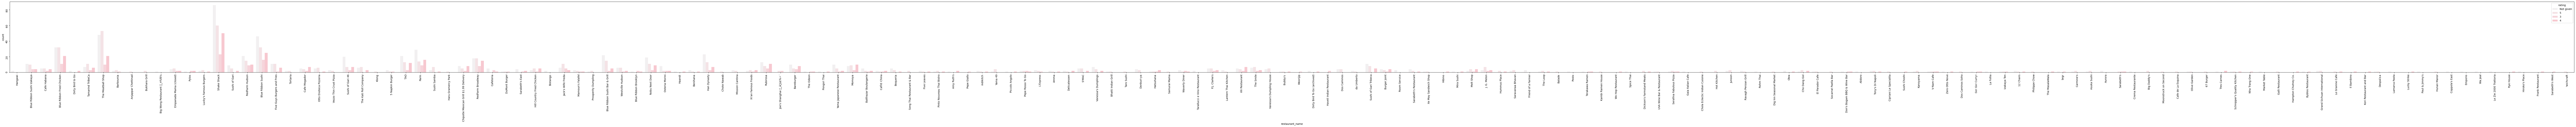

In [ ]:
# Write the code here
plt.figure(figsize=(180,5))
sns.countplot(data=df, x='restaurant_name', hue = 'rating', color='pink');
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

#### Observations: Blue Ribbon Fried Chicken, the Meatball Shop, Shake Shack, and Blue Ribbon Sushi meet the criteria for the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
from tables.table import Column
#total revenue made for the company
revenue = 0.00
cost_cols = ['cost_of_the_order']

# start the for loop
for column in cost_cols:
  # calculate the discount amount
  if column >= 20.00:
    revenue += column*1.25
  elif column >= 5.00 & column < 20.00:
    revenue += column*1.15

print(revenue)

TypeError: ignored

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

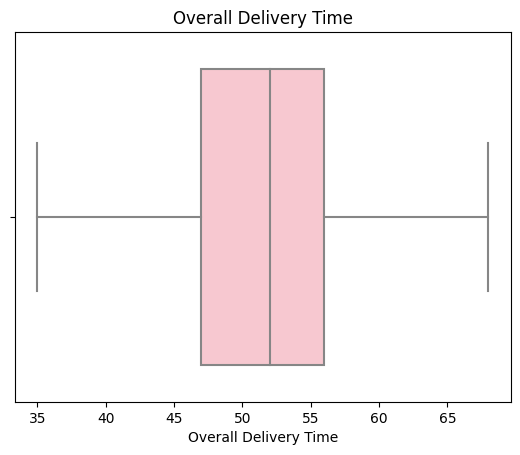

In [ ]:
# Write the code here
df['Overall Delivery Time'] = df['food_preparation_time'] + df['delivery_time']
plt.title('Overall Delivery Time')
sns.boxplot(data=df,x='Overall Delivery Time', color='pink')
plt.show()

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
Overall Rating,1898,415,Shake ShackNot given,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations: About 20% of orders take longer than 60 minutes to deliver from the time the order is put in to the time the order is delivered to the customer.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

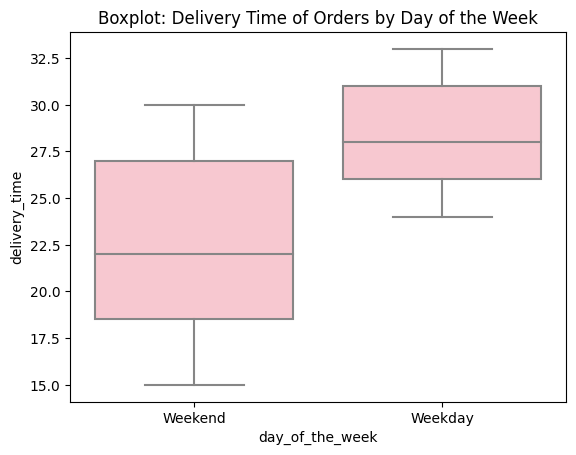

In [ ]:
# Write the code here
plt.title('Boxplot: Delivery Time of Orders by Day of the Week')
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time',showfliers=False, color='pink') # turning off outliers
plt.show()

#### Observations: The mean delivery time on the weekend is about 22.0 minutes and on weekdays about 28.5 minutes. The mean delivery time is higher on weekdays than it is on the weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Weekends have shorter wait times for deliveries than weekdays.
* The mean overall delivery time is 52.0 minutes from the time the order is placed to when it is delivered. So on average, most people wait about an order for their delivery.
* About half the orders cost $15 or less, so the service isn't for many large or expensive orders.
* There are not many customers who repeatedly use the business. Most customers have used the service once.
* Many customers do not rate their orders.
* Many of the orders seem to come from chain restaurants like Shake Shack.

### Recommendations:

*  Shake Shack has the most amount of orders and the highest rating. The business could work directly with Shake Shack to have promotions exclusive between Shake Shack and the business.
* It seems that most customers use the business once. It seems that more needs to be done to retain individuals who use the app. Waiving delivery fees for the first several orders, offering discounts for repeated use, or providing rewards and incentives for different types of use of the business could help to retain customers.
* The business could do more to support local restaurants. It seems local restaurants don't have many deliveries or as high of a number of orders. There is niche interest in local restaurants, so the business could work to support them to increase their orders and their deliveries.
* A large percentage of orders are not rated; incentives could be used to gain feedback from customers.

---